In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

def hough_transform(img, threshold_ratio: float = 0.5):
    width, height = img.shape
    theta = np.deg2rad(np.arange(-90.0, 90.0, 1))
    diag_len = int(np.ceil(np.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    cos_t = np.cos(theta)
    sin_t = np.sin(theta)
    num_thetas = len(theta)
    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas))  # Use diag_len as an integer
    # filter out non-edge pixels
    y_idxs, x_idxs = np.nonzero(img)

    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # '+ diag_len' is the same as absolute
            rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
            accumulator[int(rho), t_idx] += 1
    # Find the maximum value in the accumulator
    max_value = np.max(accumulator)

    # Set a threshold to identify the lines
    threshold = threshold_ratio * max_value

    # Find the indices of the accumulator values above the threshold
    rho_indices, theta_indices = np.where(accumulator >= threshold)

    # Convert the indices back to rho and theta values
    rhos = rhos[rho_indices]
    thetas = theta[theta_indices]
    # Create an empty image to draw the lines on
    output_img = np.zeros_like(img)

    # Draw the lines on the image
    for rho, theta in zip(rhos, thetas):
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + diag_len * (-b))
        y1 = int(y0 + diag_len * (a))
        x2 = int(x0 - diag_len * (-b))
        y2 = int(y0 - diag_len * (a))
        cv2.line(output_img, (x1, y1), (x2, y2), (255), 1)

    # Return the output image
    return output_img

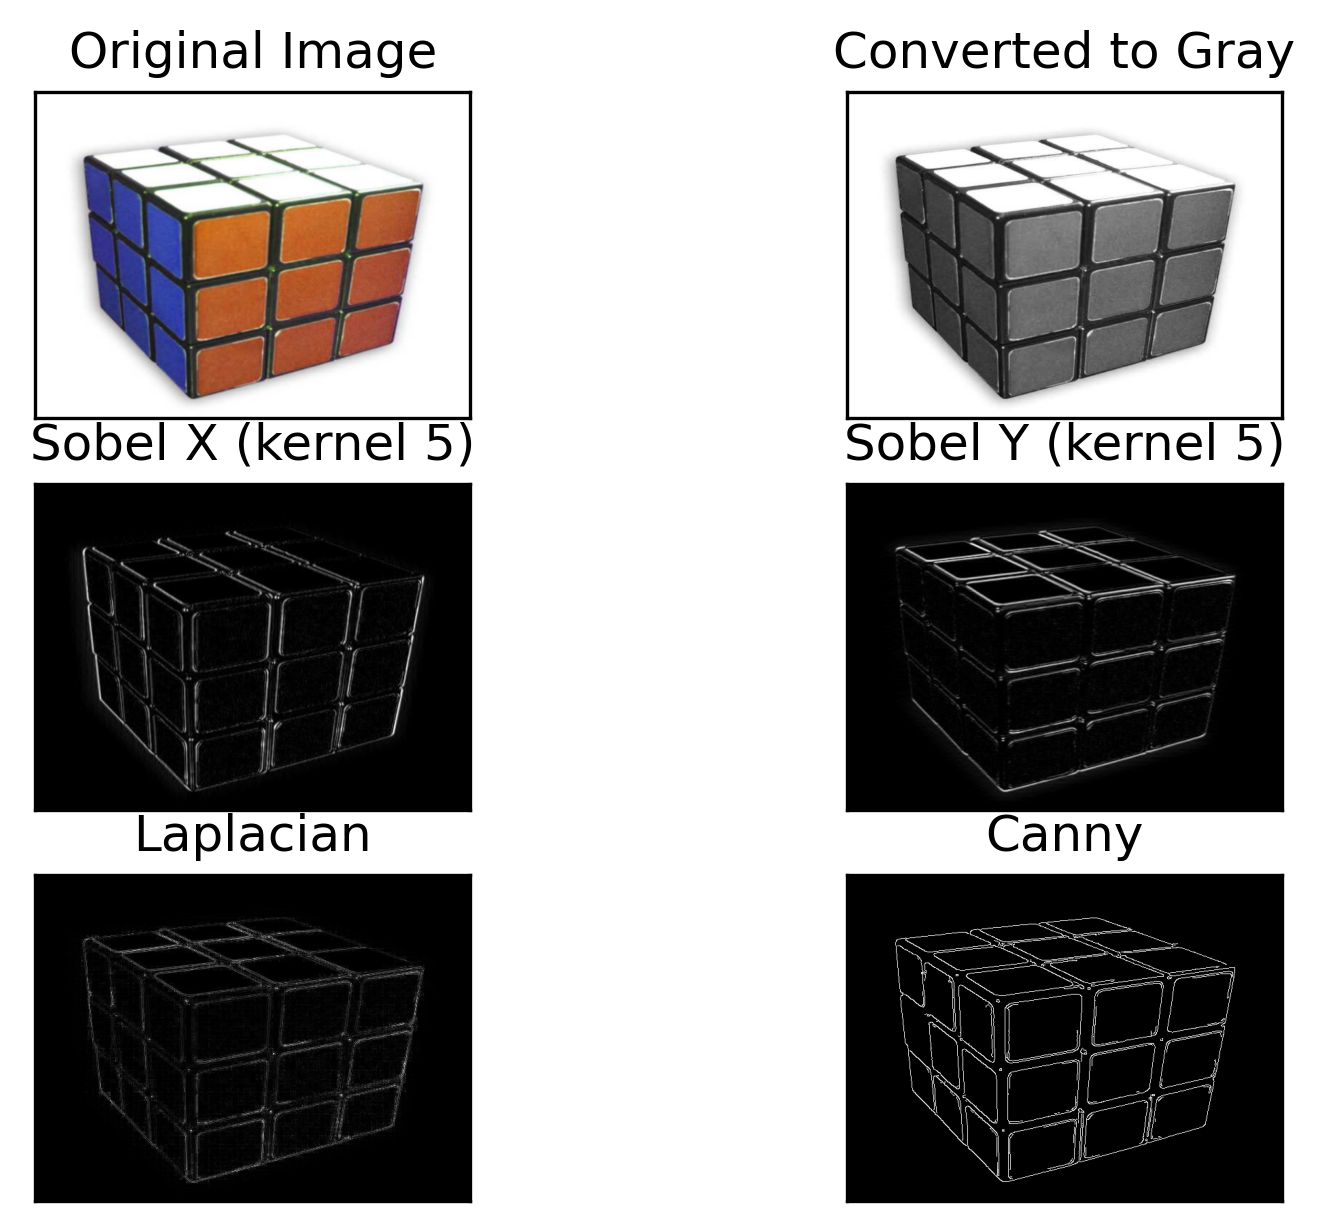

In [53]:
img = cv2.imread("C:/Users/asd15/Desktop/CV/1021/Rubiks_cube_solved.jpg")

fig = plt.figure( dpi = 300 )
img = cv2.resize(img, (640, 480 ) )
gray = cv2.cvtColor( img,  cv2.COLOR_RGB2GRAY )
kernel = 5

ax1 = fig.add_subplot(3,2,1)
ax1.set_title('Original Image')

ax1.imshow(img, interpolation = 'bicubic')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(3,2,2)
ax2.set_title('Converted to Gray')
ax2.imshow(gray, cmap = 'gray')
ax2.set_xticks([])
ax2.set_yticks([])

sobelX = cv2.Sobel( gray, cv2.CV_32F, 1, 0, ksize= kernel)

sobelX = np.abs(sobelX)
sobelX = sobelX / np.max(sobelX)

ax3 = fig.add_subplot(3,2,3)
ax3.set_title('Sobel X (kernel {})'.format(kernel))
ax3.set_xticks([])
ax3.set_yticks([])

ax3.imshow(sobelX, cmap = 'gray')

sobelY = cv2.Sobel( gray, cv2.CV_64F, 0, 1, ksize= kernel)
sobelY = np.abs(sobelY)
sobelY = sobelY / np.max(sobelY)

ax4 = fig.add_subplot(3,2,4)
ax4.set_title('Sobel Y (kernel {})'.format(kernel))
ax4.set_xticks([])
ax4.set_yticks([])

ax4.imshow(sobelY, cmap = 'gray')

laplacian = cv2.Laplacian( gray, cv2.CV_32F )
laplacian = np.abs(laplacian)
laplacian = laplacian / np.max( laplacian )

ax5 = fig.add_subplot( 3, 2, 5 )
ax5.set_title( 'Laplacian')
ax5.set_xticks([])
ax5.set_yticks([])

ax5.imshow( laplacian, cmap = 'gray')

canny = cv2.Canny( gray, 50, 300 )
ax6 = fig.add_subplot(3,2,6)
ax6.set_title('Canny')
ax6.set_xticks([])
ax6.set_yticks([])

ax6.imshow( canny, cmap = 'gray')

In [60]:
hough = hough_transform(canny,20)

In [61]:
cv2.imshow('hough',hough)
cv2.waitKey(0)
cv2.destroyAllWindows()

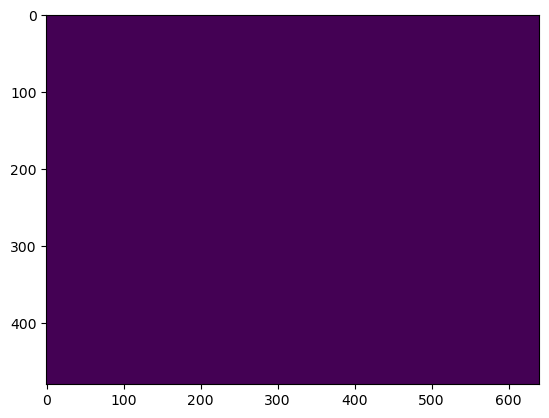

In [62]:
plt.imshow(hough)